<a href="https://colab.research.google.com/github/saffarizadeh/INSY5378/blob/main/Math_Foundations_Prep_Exercises_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://kambizsaffari.com/Logo/College_of_Business.cmyk-hz-lg.png" width="500px"/>

# *INSY 5378 - Advanced AI*

# **Prep Exercises: The Mathematical Building Blocks of Neural Networks**
## **SOLUTIONS VERSION**

Instructor: Dr. Kambiz Saffari

---

# Prep Exercises  Chapter 2: The Mathematical Building Blocks of Neural Networks

This notebook prepares you for Chapter 2 of *Deep Learning with Python*.

**You already know Python and NumPy basics.** Here we focus on **hands-on drills** that will make the chapter much easier to follow:

- Understanding **tensors**
- Working with **shapes**, **ndim**, and **dtype**
- **Slicing** and **batching** data
- **Element-wise operations** and the **ReLU activation**
- **Broadcasting** (how NumPy handles different-shaped arrays)
- **Matrix multiplication** (the core operation in neural networks)
- **Reshaping** and **flattening** data
- A taste of **gradient descent**

---
## How to Use This Notebook

1. Run cells from top to bottom
2. Fill in the `# YOUR CODE HERE` or `None` parts
3. Most exercises have **`assert` statements** that verify your answer - if no error appears, you got it right! (you see: ✅)
4. If stuck, read the hints and use `print()` to inspect shapes

---

## Setup
Run this cell first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(42)

def softmax(x, axis=-1):
    """Numerically stable softmax."""
    x = x - np.max(x, axis=axis, keepdims=True)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

print("Setup complete! ✅")

Setup complete! ✅


---
## Part 1: From NumPy Arrays to Tensors

### What is a Tensor?

In deep learning, you'll constantly hear the word **tensor**. Here's the good news: **you already know what tensors are!**

A tensor is simply a container for numerical data - exactly what NumPy arrays are. Deep learning frameworks like TensorFlow and PyTorch just use different terminology:

| NumPy Term | Deep Learning Term | Dimensions |
|------------|-------------------|------------|
| 0-D array | Scalar | 0 |
| 1-D array | Vector | 1 |
| 2-D array | Matrix | 2 |
| n-D array | n-D Tensor | n |

The **rank** of a tensor = number of dimensions = `ndim` in NumPy.

### Key Attributes (You Already Know These!)

- **`ndim`**: Number of axes (dimensions)
- **`shape`**: Size along each axis, e.g., `(3, 4)` means 3 rows, 4 columns
- **`dtype`**: Data type (`float32`, `int64`, `uint8`, etc.)

In [2]:
# Examples of tensors with different ranks

scalar = np.array(42)                    # Rank 0 (scalar)
vector = np.array([1, 2, 3, 4, 5])       # Rank 1 (vector)
matrix = np.array([[1, 2], [3, 4]])      # Rank 2 (matrix)
tensor_3d = np.ones((2, 3, 4))           # Rank 3 (3D tensor)

print(f"Scalar:    ndim={scalar.ndim}, shape={scalar.shape}")
print(f"Vector:    ndim={vector.ndim}, shape={vector.shape}")
print(f"Matrix:    ndim={matrix.ndim}, shape={matrix.shape}")
print(f"3D Tensor: ndim={tensor_3d.ndim}, shape={tensor_3d.shape}")

Scalar:    ndim=0, shape=()
Vector:    ndim=1, shape=(5,)
Matrix:    ndim=2, shape=(2, 2)
3D Tensor: ndim=3, shape=(2, 3, 4)


### Exercise 1.1: Create Tensors with Specific Properties

Create arrays matching the requirements. All `assert` statements should pass.

In [3]:
# 1A) Create a scalar (0-D) integer array with value 12
x0 = np.array(12)  # SOLUTION

# 1B) Create a 1-D float32 array: [12, 3, 6, 14, 7]
x1 = np.array([12, 3, 6, 14, 7], dtype=np.float32)  # SOLUTION

# 1C) Create a 2-D integer matrix with shape (3, 5):
# [[5, 78, 2, 34, 0],
#  [6, 79, 3, 35, 1],
#  [7, 80, 4, 36, 2]]
x2 = np.array([[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]])  # SOLUTION

# 1D) Create a 3-D tensor of zeros with shape (2, 3, 4)
x3 = np.zeros((2, 3, 4))  # SOLUTION

# --- Self-checks ---
assert isinstance(x0, np.ndarray) and x0.ndim == 0 and x0.item() == 12
assert x1.shape == (5,) and x1.dtype == np.float32
assert x2.shape == (3, 5) and x2.ndim == 2
assert x3.shape == (2, 3, 4) and x3.ndim == 3

print("✅ Exercise 1.1 passed!")

✅ Exercise 1.1 passed!


### Real-World Data as Tensors

Different types of data have standard tensor shapes:

| Data Type | Shape | Example |
|-----------|-------|--------|
| Tabular | `(samples, features)` | 1000 people × 5 attributes |
| Grayscale images | `(samples, height, width)` | 100 images × 28 × 28 |
| Color images | `(samples, height, width, channels)` | 100 images × 64 × 64 × 3 |
| Time series | `(samples, timesteps, features)` | 250 days × 390 minutes × 3 values |

**Note:** The first axis is almost always the **samples** (or **batch**) axis.

### Exercise 1.2: Interpret Tensor Shapes

What shape should each dataset have?

In [4]:
# a) 1000 people, each with 5 features (age, income, education, children, credit_score)
people_shape = (1000, 5)  # SOLUTION

# b) 32 grayscale images, each 28×28 pixels
grayscale_shape = (32, 28, 28)  # SOLUTION

# c) 16 color (RGB) images, each 64×64 pixels
color_shape = (16, 64, 64, 3)  # SOLUTION

# d) Stock data: 250 days, 390 minutes per day, 3 values per minute (price, high, low)
stock_shape = (250, 390, 3)  # SOLUTION

# --- Self-checks ---
assert people_shape == (1000, 5)
assert grayscale_shape == (32, 28, 28)
assert color_shape == (16, 64, 64, 3)
assert stock_shape == (250, 390, 3)

print("✅ Exercise 1.2 passed!")

✅ Exercise 1.2 passed!


---
## Part 2: Reshaping and Preprocessing Data

### Why Reshape?

Neural networks expect data in specific shapes. Common operations:

1. **Flattening images**: Dense layers need 1-D input, but images are 2-D. We reshape `(28, 28)` → `(784,)`
2. **Normalizing**: Scale pixel values from `[0, 255]` to `[0, 1]`
3. **Type conversion**: Convert from `uint8` to `float32`

This is exactly what you'll see in Chapter 2's MNIST preprocessing!

### Exercise 2.1: Preprocess Image Data

Given images with shape `(n, 28, 28)` and dtype `uint8` (values 0-255):
1. Reshape to `(n, 784)` — flatten each image
2. Convert to `float32`
3. Normalize to `[0, 1]` by dividing by 255

In [5]:
n = 256
images = np.random.randint(0, 256, size=(n, 28, 28), dtype=np.uint8)
print(f"Original: shape={images.shape}, dtype={images.dtype}")

# SOLUTION: reshape, convert dtype, normalize
flat = images.reshape(n, 784).astype(np.float32) / 255.0

# --- Self-checks ---
assert flat.shape == (n, 784), f"Expected shape (256, 784), got {flat.shape}"
assert flat.dtype == np.float32, f"Expected float32, got {flat.dtype}"
assert 0.0 <= flat.min() and flat.max() <= 1.0, "Values should be in [0, 1]"

print(f"Processed: shape={flat.shape}, dtype={flat.dtype}, range=[{flat.min():.2f}, {flat.max():.2f}]")
print("✅ Exercise 2.1 passed!")

Original: shape=(256, 28, 28), dtype=uint8
Processed: shape=(256, 784), dtype=float32, range=[0.00, 1.00]
✅ Exercise 2.1 passed!


**Hints:**
- `images.reshape(n, 784)` or `images.reshape(n, -1)`
- `.astype(np.float32)` for type conversion
- Divide by 255.0 (not 255) to ensure float division

### Exercise 2.2: Basic Reshaping Practice

In [6]:
arr = np.arange(12)  # [0, 1, 2, ..., 11]
print(f"Original: {arr}, shape={arr.shape}")

# a) Reshape to (3, 4)
a = arr.reshape(3, 4)  # SOLUTION

# b) Reshape to (4, 3)
b = arr.reshape(4, 3)  # SOLUTION

# c) Reshape to (2, 2, 3)
c = arr.reshape(2, 2, 3)  # SOLUTION

# --- Self-checks ---
assert a.shape == (3, 4)
assert b.shape == (4, 3)
assert c.shape == (2, 2, 3)

print(f"(3,4):\n{a}\n")
print(f"(4,3):\n{b}\n")
print(f"(2,2,3):\n{c}")
print("\n✅ Exercise 2.2 passed!")

Original: [ 0  1  2  3  4  5  6  7  8  9 10 11], shape=(12,)
(3,4):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

(4,3):
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

(2,2,3):
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]

✅ Exercise 2.2 passed!


---
## Part 3: Slicing and Batching

### Why Batching Matters

Neural networks don't process one sample at a time — they process **batches** (groups of samples). This is more efficient and helps with training stability.

If `batch_size = 128` and we want batch `n`:
- Start index: `n * batch_size`
- End index: `(n + 1) * batch_size`

### Exercise 3.1: Extract Batches

In [7]:
def get_batch(data, batch_size, n):
    """Return batch number n (0-indexed) from data."""
    # SOLUTION
    start = n * batch_size
    end = (n + 1) * batch_size
    return data[start:end]

# Test data
data = np.arange(60000)  # Like MNIST's 60000 training samples

b0 = get_batch(data, 128, 0)  # First batch
b3 = get_batch(data, 128, 3)  # Fourth batch

# --- Self-checks ---
assert b0.shape == (128,) and b0[0] == 0 and b0[-1] == 127
assert b3[0] == 384 and b3[-1] == 511  # 128*3=384, 128*4-1=511

print(f"Batch 0: indices {b0[0]} to {b0[-1]}")
print(f"Batch 3: indices {b3[0]} to {b3[-1]}")
print("✅ Exercise 3.1 passed!")

Batch 0: indices 0 to 127
Batch 3: indices 384 to 511
✅ Exercise 3.1 passed!


### Exercise 3.2: Slice Image Regions (Center Crop)

A common operation is cropping images. Extract the **center 14×14 region** from 28×28 images.

For a 28×28 image, the center 14×14 uses rows `7:21` and columns `7:21`.

In [8]:
images = np.random.randint(0, 256, size=(64, 28, 28), dtype=np.uint8)

# SOLUTION: extract center 14×14 from all 64 images
center = images[:, 7:21, 7:21]

# --- Self-checks ---
assert center.shape == (64, 14, 14)
assert np.array_equal(center, images[:, 7:21, 7:21])

print(f"Original shape: {images.shape}")
print(f"Center crop shape: {center.shape}")
print("✅ Exercise 3.2 passed!")

Original shape: (64, 28, 28)
Center crop shape: (64, 14, 14)
✅ Exercise 3.2 passed!


---
## Part 4: Element-wise Operations and ReLU

### What Are Element-wise Operations?

Operations applied to each element independently:
```python
[1, 2, 3] + [10, 20, 30] = [11, 22, 33]  # Add corresponding elements
[1, 2, 3] * 2 = [2, 4, 6]                 # Multiply each by 2
```

### The ReLU Activation Function

ReLU (Rectified Linear Unit) is the most common activation function:

$$\text{ReLU}(x) = \max(x, 0)$$

- Positive values stay the same
- Negative values become 0

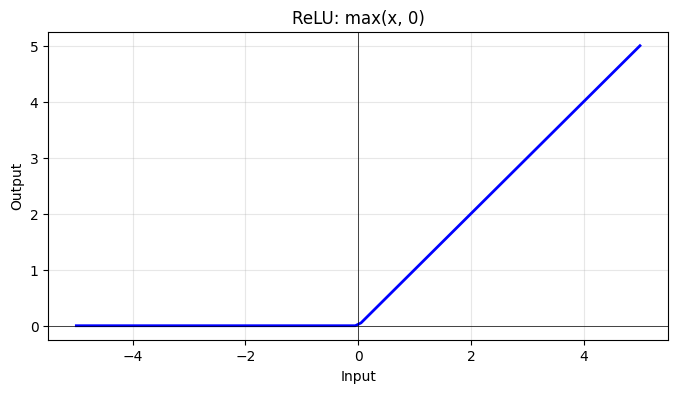

In [9]:
# Visualize ReLU
x = np.linspace(-5, 5, 100)
y = np.maximum(x, 0)  # This is ReLU!

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', linewidth=2)
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.xlabel('Input'); plt.ylabel('Output')
plt.title('ReLU: max(x, 0)')
plt.grid(True, alpha=0.3)
plt.show()

### Exercise 4.1: Implement ReLU (Vectorized vs Loop)

NumPy's **vectorized** operations are much faster than Python loops. Implement ReLU both ways to see the difference.

In [10]:
def relu_loop(x):
    """ReLU using Python loops (slow)."""
    out = x.copy()
    # SOLUTION: nested loops to set negative values to 0
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            if out[i, j] < 0:
                out[i, j] = 0
    return out

def relu_vectorized(x):
    """ReLU using NumPy (fast)."""
    # SOLUTION: use np.maximum
    return np.maximum(x, 0)

# Test
x = np.random.randn(200, 300).astype(np.float32)
a = relu_loop(x)
b = relu_vectorized(x)

assert np.allclose(a, b), "Results don't match!"

# Timing comparison
t0 = time.time(); _ = relu_vectorized(x); t_vec = time.time() - t0
t0 = time.time(); _ = relu_loop(x); t_loop = time.time() - t0

print(f"Vectorized: {t_vec:.4f}s | Loop: {t_loop:.4f}s | Speedup: {t_loop/t_vec:.0f}x")
print("✅ Exercise 4.1 passed!")

Vectorized: 0.0003s | Loop: 0.0333s | Speedup: 128x
✅ Exercise 4.1 passed!


---
## Part 5: Broadcasting

### What is Broadcasting?

Broadcasting lets NumPy operate on arrays with different shapes by automatically "stretching" the smaller one.

**Example:** Adding a bias vector to a batch of outputs:
```python
output = np.zeros((32, 10))  # 32 samples, 10 features
bias = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # 10 biases
result = output + bias  # bias is added to EACH row!
```

### Broadcasting Rules
NumPy compares shapes from right to left. Dimensions are compatible if:
- They're equal, OR
- One of them is 1

### Exercise 5.1: Broadcasting in Action

In [11]:
X = np.random.random((32, 10)).astype(np.float32)  # 32 samples, 10 features
y = np.random.random((10,)).astype(np.float32)     # bias vector

# Method 1: Broadcasting (automatic)
Z_broadcast = X + y  # SOLUTION

# Method 2: Explicit tiling (manual — to understand what broadcasting does)
Y_tiled = np.tile(y, (32, 1))  # SOLUTION
Z_tiled = X + Y_tiled  # SOLUTION

# --- Self-checks ---
assert Z_broadcast.shape == (32, 10)
assert Y_tiled.shape == (32, 10)
assert np.allclose(Z_broadcast, Z_tiled)

print("Broadcasting adds y to each row of X automatically!")
print("✅ Exercise 5.1 passed!")

Broadcasting adds y to each row of X automatically!
✅ Exercise 5.1 passed!


### Exercise 5.2: Center Data (Subtract Mean)

A common preprocessing step: subtract the mean of each feature to center the data around 0.

In [12]:
# Data: 5 samples, 3 features with different scales
data = np.array([[10, 100, 1000],
                 [20, 200, 2000],
                 [30, 300, 3000],
                 [40, 400, 4000],
                 [50, 500, 5000]], dtype=np.float32)

# Step 1: Compute mean of each feature (column) using axis=0
feature_means = data.mean(axis=0)  # SOLUTION

# Step 2: Subtract means using broadcasting
centered = data - feature_means  # SOLUTION

# --- Self-checks ---
assert feature_means.shape == (3,)
assert np.allclose(feature_means, [30, 300, 3000])
assert np.allclose(centered.mean(axis=0), [0, 0, 0], atol=1e-5)

print(f"Feature means: {feature_means}")
print(f"Centered data mean per feature: {centered.mean(axis=0)}")
print("✅ Exercise 5.2 passed!")

Feature means: [  30.  300. 3000.]
Centered data mean per feature: [0. 0. 0.]
✅ Exercise 5.2 passed!


---
## Part 6: Matrix Multiplication (Dot Product)

### The Core Operation in Neural Networks

Every layer in a neural network uses matrix multiplication:
```python
output = input @ weights + bias
```

### Matrix Multiplication Rules

For `A @ B` to work:
- A has shape `(m, n)`
- B has shape `(n, p)` — **inner dimensions must match!**
- Result has shape `(m, p)`

### Don't Confuse These!
- `A * B` = element-wise multiplication
- `A @ B` = matrix multiplication

In [13]:
# Demonstrate the difference
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print("A:")
print(A)
print("\nB:")
print(B)
print("\nElement-wise (A * B):")
print(A * B)
print("\nMatrix multiplication (A @ B):")
print(A @ B)

A:
[[1 2]
 [3 4]]

B:
[[5 6]
 [7 8]]

Element-wise (A * B):
[[ 5 12]
 [21 32]]

Matrix multiplication (A @ B):
[[19 22]
 [43 50]]


### Exercise 6.1: Matrix Multiplication Practice

In [14]:
v = np.random.random((32,)).astype(np.float32)   # vector
w = np.random.random((32,)).astype(np.float32)   # vector
A = np.random.random((20, 32)).astype(np.float32) # matrix
B = np.random.random((32, 15)).astype(np.float32) # matrix

# SOLUTIONS:
# 1. Vector dot product: v · w → scalar
s = v @ w  # or np.dot(v, w)

# 2. Matrix-vector product: A @ v → vector of shape (20,)
Av = A @ v

# 3. Matrix-matrix product: A @ B → matrix of shape (20, 15)
AB = A @ B

# --- Self-checks ---
assert np.isscalar(s) or (isinstance(s, np.ndarray) and s.shape == ())
assert Av.shape == (20,)
assert AB.shape == (20, 15)

print(f"v · w = scalar")
print(f"A(20,32) @ v(32,) = shape {Av.shape}")
print(f"A(20,32) @ B(32,15) = shape {AB.shape}")
print("✅ Exercise 6.1 passed!")

v · w = scalar
A(20,32) @ v(32,) = shape (20,)
A(20,32) @ B(32,15) = shape (20, 15)
✅ Exercise 6.1 passed!


### Exercise 6.2: Implement a Dense Layer Forward Pass

A Dense layer computes: `y = X @ W + b`

Where:
- `X`: input batch with shape `(batch_size, input_dim)`
- `W`: weights with shape `(input_dim, output_dim)`
- `b`: bias with shape `(output_dim,)`
- `y`: output with shape `(batch_size, output_dim)`

In [15]:
def dense_forward(X, W, b):
    """Compute forward pass of a Dense layer."""
    # SOLUTION
    return X @ W + b

# Test
batch, in_dim, out_dim = 64, 20, 10
X = np.random.randn(batch, in_dim).astype(np.float32)
W = np.random.randn(in_dim, out_dim).astype(np.float32)
b = np.random.randn(out_dim).astype(np.float32)

y = dense_forward(X, W, b)

# --- Self-checks ---
assert y.shape == (batch, out_dim)
assert np.allclose(y, X @ W + b)

print(f"Input: {X.shape} → Output: {y.shape}")
print("✅ Exercise 6.2 passed!")

Input: (64, 20) → Output: (64, 10)
✅ Exercise 6.2 passed!


---
## Part 7: Softmax and Cross-Entropy Loss

### Classification Output

For classification, neural networks output **logits** (raw scores). We convert these to probabilities using **softmax**:

$$\text{softmax}(z)_i = \frac{e^{z_i}}{\sum_j e^{z_j}}$$

The **cross-entropy loss** measures how wrong the predictions are:

$$\text{loss} = -\log(p_{\text{true class}})$$

### Exercise 7.1: Softmax and Cross-Entropy

In [16]:
K = 10  # 10 classes (like digits 0-9)
z = np.random.randn(K).astype(np.float32)  # logits (raw scores)
y_true = 7  # true class

# SOLUTIONS:
# 1. Apply softmax to get probabilities (use the softmax function from setup)
p = softmax(z)

# 2. Compute cross-entropy loss: -log(probability of true class)
loss = -np.log(p[y_true])

# --- Self-checks ---
assert p.shape == (K,)
assert np.allclose(p.sum(), 1.0, atol=1e-6), "Probabilities should sum to 1"
assert loss >= 0, "Loss should be non-negative"

print(f"Logits z: {z[:5]}... (showing first 5)")
print(f"Probabilities p: {p[:5]}... (showing first 5)")
print(f"Sum of probabilities: {p.sum():.6f}")
print(f"Probability of true class {y_true}: {p[y_true]:.4f}")
print(f"Cross-entropy loss: {loss:.4f}")
print("✅ Exercise 7.1 passed!")

Logits z: [ 0.75751543  1.0895815  -2.1733541  -1.5212309   0.6766437 ]... (showing first 5)
Probabilities p: [0.09227411 0.1286158  0.00492288 0.00945002 0.08510551]... (showing first 5)
Sum of probabilities: 1.000000
Probability of true class 7: 0.0334
Cross-entropy loss: 3.3983
✅ Exercise 7.1 passed!


---
## Part 8: A Taste of Gradient Descent

### How Neural Networks Learn

Training a neural network involves:
1. Compute predictions (forward pass)
2. Compute loss (how wrong are we?)
3. Compute gradients (which direction reduces loss?)
4. Update weights: `w = w - learning_rate * gradient`

Let's implement this for a simple 1D linear model: `y_pred = w*x + b`

### Exercise 8.1: Numerical Gradient Descent

We'll fit a line to data using **numerical gradients** (approximating derivatives with small differences).

$$\frac{\partial L}{\partial w} \approx \frac{L(w + \epsilon) - L(w - \epsilon)}{2\epsilon}$$

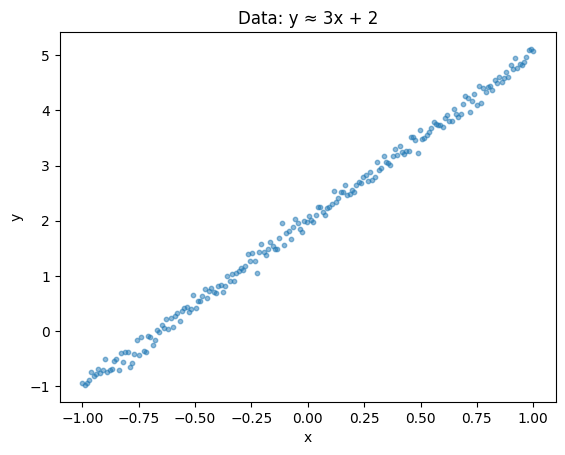

In [17]:
# Generate data: y ≈ 3x + 2 with some noise
x = np.linspace(-1, 1, 200).astype(np.float32)
y = (3.0 * x + 2.0 + 0.1 * np.random.randn(*x.shape)).astype(np.float32)

plt.scatter(x, y, alpha=0.5, s=10)
plt.xlabel('x'); plt.ylabel('y')
plt.title('Data: y ≈ 3x + 2')
plt.show()

In [18]:
def mse_loss(w, b, x, y):
    """Mean squared error: average of (y_pred - y)^2"""
    # SOLUTION
    y_pred = w * x + b
    return np.mean((y_pred - y) ** 2)

def numerical_gradients(w, b, x, y, eps=1e-3):
    """Compute gradients using finite differences."""
    # SOLUTION
    # dL/dw ≈ (L(w+eps, b) - L(w-eps, b)) / (2*eps)
    dw = (mse_loss(w + eps, b, x, y) - mse_loss(w - eps, b, x, y)) / (2 * eps)

    # dL/db ≈ (L(w, b+eps) - L(w, b-eps)) / (2*eps)
    db = (mse_loss(w, b + eps, x, y) - mse_loss(w, b - eps, x, y)) / (2 * eps)

    return dw, db

# Initialize weights
w, b = 0.0, 0.0
lr = 0.1  # learning rate

# Compute initial loss
loss_before = mse_loss(w, b, x, y)

# Compute gradients
dw, db = numerical_gradients(w, b, x, y)

# Update weights (one step of gradient descent)
w_new = w - lr * dw
b_new = b - lr * db

# Compute new loss
loss_after = mse_loss(w_new, b_new, x, y)

print(f"Before: w={w:.3f}, b={b:.3f}, loss={loss_before:.4f}")
print(f"Gradients: dw={dw:.4f}, db={db:.4f}")
print(f"After:  w={w_new:.3f}, b={b_new:.3f}, loss={loss_after:.4f}")

# --- Self-check ---
assert loss_after < loss_before, "Loss should decrease after one gradient step!"
print("\n✅ Exercise 8.1 passed! Loss decreased.")

Before: w=0.000, b=0.000, loss=7.0879
Gradients: dw=-2.0308, db=-4.0069
After:  w=0.203, b=0.401, loss=5.2441

✅ Exercise 8.1 passed! Loss decreased.


### Optional: Train for Many Steps

If you finish early, try training for 100 steps to see w approach 3 and b approach 2.

Step 0: w=0.203, b=0.401, loss=7.0879
Step 20: w=2.319, b=1.985, loss=0.1984
Step 40: w=2.843, b=2.004, loss=0.0210
Step 60: w=2.973, b=2.004, loss=0.0102
Step 80: w=3.006, b=2.004, loss=0.0095

Final: w=3.014 (target: 3.0), b=2.004 (target: 2.0)


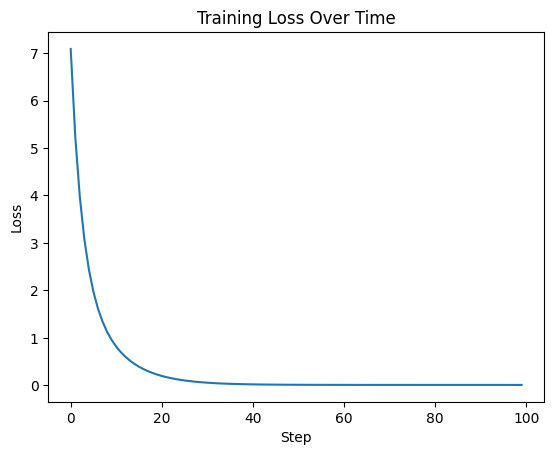

In [19]:
# OPTIONAL: Full training loop (SOLUTION included)
w, b = 0.0, 0.0
lr = 0.1
losses = []

for step in range(100):
    loss = mse_loss(w, b, x, y)
    losses.append(loss)
    dw, db = numerical_gradients(w, b, x, y)
    w = w - lr * dw
    b = b - lr * db

    if step % 20 == 0:
        print(f"Step {step}: w={w:.3f}, b={b:.3f}, loss={loss:.4f}")

print(f"\nFinal: w={w:.3f} (target: 3.0), b={b:.3f} (target: 2.0)")

# Plot loss curve
plt.plot(losses)
plt.xlabel('Step'); plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

---
## Part 9: Full Forward Pass Simulation

Let's put everything together: preprocessing → Dense layer 1 → ReLU → Dense layer 2 → Softmax

In [20]:
# Simulate a mini neural network for digit classification
np.random.seed(42)

# 1. GENERATE DATA: 32 random 8×8 "images"
batch_size = 32
raw_images = np.random.randint(0, 256, size=(batch_size, 8, 8), dtype=np.uint8)
print(f"Raw images: {raw_images.shape}, dtype={raw_images.dtype}")

# 2. PREPROCESS: flatten, convert to float32, normalize
X = raw_images.reshape(batch_size, -1).astype(np.float32) / 255.0
print(f"Preprocessed: {X.shape}, dtype={X.dtype}, range=[{X.min():.2f}, {X.max():.2f}]")

# 3. LAYER 1: Dense (64 → 32) + ReLU
W1 = np.random.randn(64, 32).astype(np.float32) * 0.1
b1 = np.zeros(32, dtype=np.float32)
z1 = X @ W1 + b1
a1 = np.maximum(z1, 0)  # ReLU
print(f"After Layer 1 + ReLU: {a1.shape}")

# 4. LAYER 2: Dense (32 → 10)
W2 = np.random.randn(32, 10).astype(np.float32) * 0.1
b2 = np.zeros(10, dtype=np.float32)
z2 = a1 @ W2 + b2
print(f"After Layer 2: {z2.shape}")

# 5. SOFTMAX: convert to probabilities
probs = softmax(z2)
print(f"Probabilities: {probs.shape}, each row sums to {probs[0].sum():.4f}")

# 6. PREDICTIONS
predictions = np.argmax(probs, axis=1)
print(f"\nPredicted classes for first 10 samples: {predictions[:10]}")

print("\n✅ Complete forward pass simulation done!")

Raw images: (32, 8, 8), dtype=uint8
Preprocessed: (32, 64), dtype=float32, range=[0.00, 1.00]
After Layer 1 + ReLU: (32, 32)
After Layer 2: (32, 10)
Probabilities: (32, 10), each row sums to 1.0000

Predicted classes for first 10 samples: [9 3 9 3 9 9 9 3 9 9]

✅ Complete forward pass simulation done!


---
## Summary

You've practiced all the key operations used in Chapter 2:

| Concept | What You Did | Used In Chapter For |
|---------|-------------|--------------------|
| Tensors | Created arrays of different ranks | Storing data & weights |
| Reshaping | Flattened images (28×28 → 784) | Preprocessing |
| Slicing | Extracted batches and crops | Training loop |
| Element-wise ops | Implemented ReLU | Activation functions |
| Broadcasting | Added bias to batches | Dense layer computation |
| Matrix multiplication | Implemented Dense layer | Core layer operation |
| Softmax | Converted logits to probabilities | Classification output |
| Gradient descent | Minimized loss with gradients | Training the network |

